https://www.youtube.com/watch?v=AACPaoDsd50

In [168]:
import tensorflow as tf
from tensorflow import keras

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [170]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

# X.shape = (6470, 2500)
# y.shape = (6470,)
X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [171]:
class_names = ['male', 'female']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [172]:
train_images.shape

(4852, 50, 50)

In [173]:
len(train_labels)

4852

In [174]:
print(type(train_labels[0]))

<class 'numpy.float64'>


In [175]:
test_images.shape

(1618, 50, 50)

In [176]:
len(test_labels)

1618

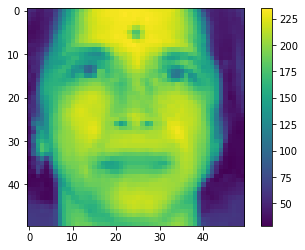

In [177]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [178]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [179]:
'''
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()
'''

'\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i], cmap=plt.cm.binary)\n    plt.xlabel(class_names[int(train_labels[i])])\nplt.show()\n'

In [180]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50,50)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [181]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [182]:
# Train the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
152/152 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.6628
Epoch 2/10
152/152 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7560
Epoch 3/10
152/152 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7852
Epoch 4/10
152/152 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7908
Epoch 5/10
152/152 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7978
Epoch 6/10
152/152 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8145
Epoch 7/10
152/152 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8306
Epoch 8/10
152/152 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8236
Epoch 9/10
152/152 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8252
Epoch 10/10
152/152 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8271

In [183]:
# Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

51/51 [==============================] - 0s 931us/step - loss: 0.3807 - accuracy: 0.8405
Test accuracy: 0.8405438661575317


In [184]:
predictions = model.predict(test_images)
predictions

In [186]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    if i[0]> i[1]:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)
print(y_predicted)

[1 1 0 ... 1 0 0]


BACC = 83.41548242747805


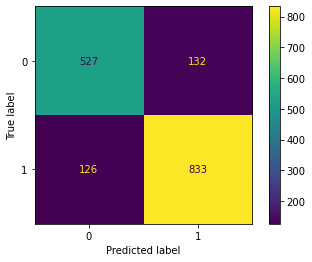

In [188]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")